### What are the physical attributes that makes a great pitcher?

In baseball, a pitcher is the most influential player on the team. Therefore, it is important to understand the factors that make a great pitcher. We will analyze the data from **9,302** different pitchers that played in the MLB from **1871** to **2016** in order to see if physical attributes (height, weight, dominant hand) have an impact on pitching and if so, which physcial attributes have the most impact on succesful pitching.

In [52]:
%matplotlib inline
import pandas as pd #importing all the neccesary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading in files and assigning them to variables.

In [53]:
master_df = pd.read_csv('Master.csv')#reading master.csv into notebook and assigning it to the var master
batting_df = pd.read_csv('Batting.csv')#reading batting.csv into notebook and assigning it to the var batting
pitching_df = pd.read_csv('Pitching.csv')#reading pitching.csv into notebook and assigning it to the var pitching


I cleaned the pitcher data by creating a dataframe with only the necessary columns (playerID, Batters Hit By Pitch, Homeruns, Innings Pitched, Strikeouts). In the IPouts column, the original statistic had been multiplied by 3, therefore I had to divide the IPouts by three in order to find the actual innings pitched. I also added a column that calculated FIP scores. FIP scores are explained below. I then created a new dataframe with the just the playerID and their averaged FIP score for all the seasons they played. 










The only column with null values was the Hit By Pitch(HBP) column, and it had exactly 558 null values, which all appeared in the seasons before 1885. It is obvious that the HBP metric was not yet being recorded consistently at this time in MLB history. I removed all the rows that contained null values, which was only 1.24% of all the rows. I removed these rows because the FIP score requires the HBP statistic. This data removal will cause the analysis to overlook most of the years before 1885, but I cannot see this removal having an enormous impact on the analysis as only 1.24% of the rows were removed. 

In order to calculate and rank pitcher performance, I will be using a baseball formula called a FIP score, which is a common baseball statistic that "estimates a pitcher's run prevention independent of the performance of their defence."  In other words, a FIP score will rank a pitcher's talent level based on the variables a pitcher controls directly (strikeouts, walks, bit by pitches, and home runs), as opposed to using a formula that could include results impacted by the other players, which could impact the pitchers rankings due to outside involvement.  Lower scores indicate a better rating. The FIP Constant will be 3.10, just to standardize the scores onto a well known ERA scale. The formula is shown below:













$$FIP = \frac{13 \times HR+3 \times (BB+HBP)-2 \times SO}{IP}+FIP Constant$$

In [54]:

key_fip_stats_df=pitching_df[['playerID','HBP','SO','HR','BB','IPouts']].copy() #creating new dataframe with the fip values
key_fip_stats_df['IPouts']=key_fip_stats_df['IPouts']/3 #IPouts column consists of innings pitched X 3, finding the actual innings pitched
num_null=key_fip_stats_df.isnull().sum()
num_total=len(key_fip_stats_df)
key_fip_stats_df=key_fip_stats_df.dropna()#drops rows that have null values
key_fip_stats_df=key_fip_stats_df[key_fip_stats_df.IPouts>9]#getting only the pitcher's season data if they pitched over 9 innings

In [55]:
def fipscore(hr,bb,hbp,so,ip):#function to calculate fip score 
    return ((13*hr)+(3*(bb+hbp))-(2*so))/ip+3.10
key_fip_stats_df['FIP']= np.vectorize(fipscore)(key_fip_stats_df['HR'], key_fip_stats_df['BB'],key_fip_stats_df['HBP'],key_fip_stats_df['SO'],key_fip_stats_df['IPouts'])#applying function to each row to find fip score for each pitcher

fip_averages=key_fip_stats_df.groupby(['playerID'],as_index=False)[['FIP']].mean() #getting the average fip score of each pitcher






I created a dataframe from Master.csv that contains the physical attributes of each player. I then performed an inner merge on the physical_attributes dataframe and the fip_averages data from using the player_ID as the key. This new dataframe, complete_fip_to_attribute_df, contains important player statistics that will enable me to find possible links between player performance and physical attributes. 

In [57]:
physical_attributes_df=master_df[['playerID','weight','height','throws','nameFirst','nameLast']].copy()#creating new dataframe for physical attrubutes

complete_fip_to_attribute_df=fip_averages.merge(physical_attributes_df,on='playerID',how='inner')#inner merge to create dataframe that has all attributes we need
mean_weight=complete_fip_to_attribute_df['weight'].mean()#finding mean weight
mean_height=complete_fip_to_attribute_df['height'].mean()#finding mean height

#complete_fip_to_attribute_df.head()

Overall pitcher average weight: 191.86


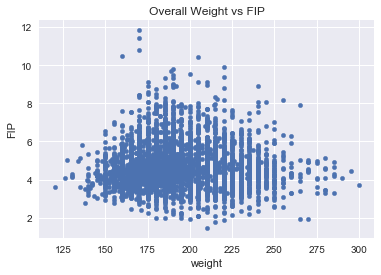

Top 5% pitchers average weight: 196.95


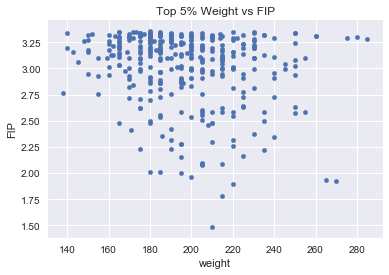

Bottom 5% pitchers average weight: 193.43


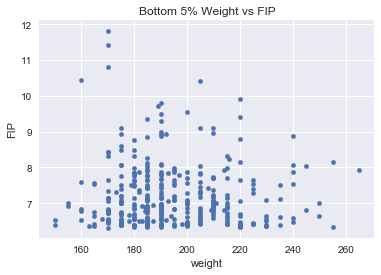

In [58]:
top_pitchers_fip=complete_fip_to_attribute_df[complete_fip_to_attribute_df.FIP<complete_fip_to_attribute_df.FIP.quantile(.05)]#new dataframe containing the best FIP scores
bottom_pitchers_fip=complete_fip_to_attribute_df[complete_fip_to_attribute_df.FIP>complete_fip_to_attribute_df.FIP.quantile(.95)]#new dataframe containing the worst FIP scores
print('Overall pitcher average weight:',round(complete_fip_to_attribute_df['weight'].mean(),2))#printing graphs and averages
total_weight_plot=complete_fip_to_attribute_df.plot(x='weight', y='FIP', kind='scatter', title='Overall Weight vs FIP')
plt.show()
print('Top 5% pitchers average weight:', round(top_pitchers_fip['weight'].mean(),2))
top_pitcher_weight_plot=top_pitchers_fip.plot(x='weight', y='FIP', kind='scatter',title='Top 5% Weight vs FIP')
plt.show()
print('Bottom 5% pitchers average weight:', round(bottom_pitchers_fip['weight'].mean(),2))
bottom_pitchers_fip.plot(x='weight', y='FIP', kind='scatter',title='Bottom 5% Weight vs FIP')
plt.show()




Above are the distributions of the top and bottom 5% of FIP scores relative to their weight, and the averages for the top 5% of pitchers, bottom 5% of pitchers, and overall pitchers weight. While the average weight of the top 5% of pitchers is a little higher than the overall average, it is barely greater than the average of the bottom 5% of the pitchers. The top 5% has an inverted bell curve shape while the bottom 5% has a normal bell curve shape, leading me to believe that weight does not play a major role in pitcher performance. 

Overall pitcher average height: 73.29


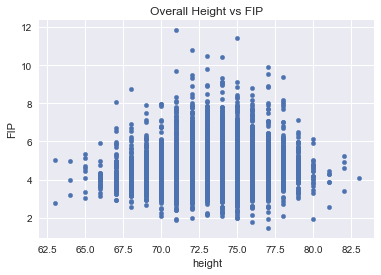

Top 5% pitchers average height: 73.14


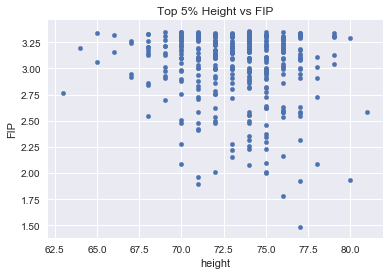

Bottom 5% pitchers average height: 73.65


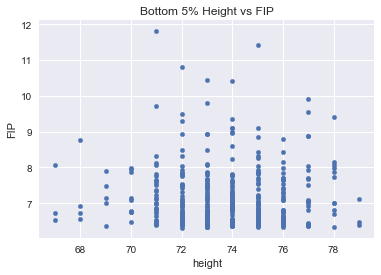

In [59]:
print('Overall pitcher average height:',round(complete_fip_to_attribute_df['height'].mean(),2))#printing graphs and averages
total_height_plot=complete_fip_to_attribute_df.plot(x='height', y='FIP', kind='scatter',title='Overall Height vs FIP')
plt.show()
print('Top 5% pitchers average height:', round(top_pitchers_fip['height'].mean(),2))
top_pitcher_height_plot=top_pitchers_fip.plot(x='height', y='FIP', kind='scatter',title='Top 5% Height vs FIP')

plt.show()
print('Bottom 5% pitchers average height:', round(bottom_pitchers_fip['height'].mean(),2))
bottom_pitchers_fip.plot(x='height', y='FIP', kind='scatter',title='Bottom 5% Height vs FIP')
plt.show()

Above are the distributions of the top and bottom 5% of FIP scores relative to their weight, and the averages for the top 5% of pitchers, bottom 5% of pitchers, and overall pitchers weight. Height also does not seem to play a major factor in pitcher perfomance as the difference between the overall average weight, average weight of the top 5% of pitchers, and average weight of the bottom 5% of pitchers is not stastically significant. 

Overall pitcher average FIP score: 4.62
Right hand pitchers average FIP score: 4.62
Left hand pitchers average FIP score: 4.63


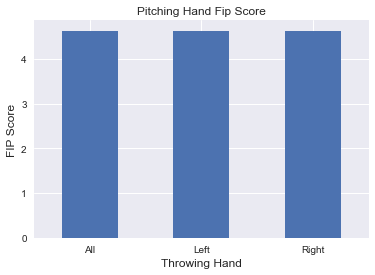

In [60]:
right_hand_pitchers=complete_fip_to_attribute_df[complete_fip_to_attribute_df['throws']=='R']#creating dataframes with only right hand pitchers and left hand pitchers
left_hand_pitchers=complete_fip_to_attribute_df[complete_fip_to_attribute_df['throws']=='L']

av_df=pd.Series({'Right': round(right_hand_pitchers['FIP'].mean(),2),'Left':round(left_hand_pitchers['FIP'].mean(),2), 'All':round(complete_fip_to_attribute_df['FIP'].mean(),2)})

av_plot=av_df.plot(kind='bar', title='Pitching Hand Fip Score',rot=0,)
av_plot.set_xlabel("Throwing Hand", fontsize=12)
av_plot.set_ylabel("FIP Score", fontsize=12)
print('Overall pitcher average FIP score:',round(complete_fip_to_attribute_df['FIP'].mean(),2))#printing FIP averages
print('Right hand pitchers average FIP score:', round(right_hand_pitchers['FIP'].mean(),2))
print('Left hand pitchers average FIP score:', round(left_hand_pitchers['FIP'].mean(),2))
plt.show()

Above are the average FIP scores of all the pitchers, right hand pitchers, and left hand pitchers. Again we find that the throwing hand does not have a significant impact on the FIP score.

### Conclusion
After analyzing FIP data in relation to pitcher height, weight, and throwing hand, these physcial attributes seem to have no definitive impact on FIP score in the MLB.  One expalantion for this outcome is that while pitchers in the MLB have an average weight of 191.86 Ibs, an average height of 73.29 In, and are around 2.6 times more likely to be right handed, when pitchers get into the MLB their physical attributes do not have much impact on their performance. All these findings are tentative and it must be understood that FIP Score may not be the most effective measure of pitching, and could be a limitation in my analysis. 


#### Resources:
<p>https://www.stackoverflow.com</p> 
<p>http://www.fangraphs.com/library/pitching/fip/</p>
<p>https://www.beyondtheboxscore.com/2013/11/19/5121600/what-is-fip-fielding-independent-pitching-basic-sabermetrics</p>
<p>https://daringfireball.net/projects/markdown/basics</p>
<p>http://data-blog.udacity.com/posts/2016/10/latex-primer/</p>